In [627]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [628]:
laptops = pd.read_csv(r"C:\Users\Hp\Documents\My python folder\Laptop price predictor\laptop_data.csv")

In [629]:
laptops.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [630]:
laptops.shape

(1303, 12)

In [631]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [632]:
# Checking for duplicates
laptops.duplicated().sum()

0

In [633]:
# checking for null values
laptops.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## DATA CLEANING

In [634]:
laptops["Ram"] = laptops["Ram"].str.replace("GB"," ")

In [635]:
laptops["Weight"] = laptops["Weight"].str.replace("kg"," ")

In [636]:
laptops.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [637]:
laptops["Weight"] = laptops["Weight"].astype('float')
laptops["Ram"] = laptops["Ram"].astype('int')

## EDA

<Axes: xlabel='Price', ylabel='Density'>

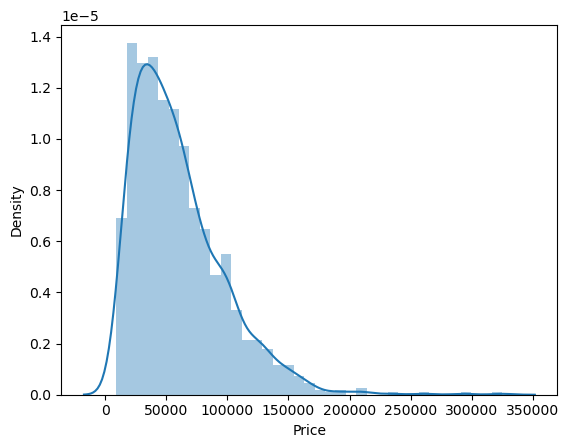

In [638]:
sns.distplot(laptops["Price"])

In [639]:
laptops["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

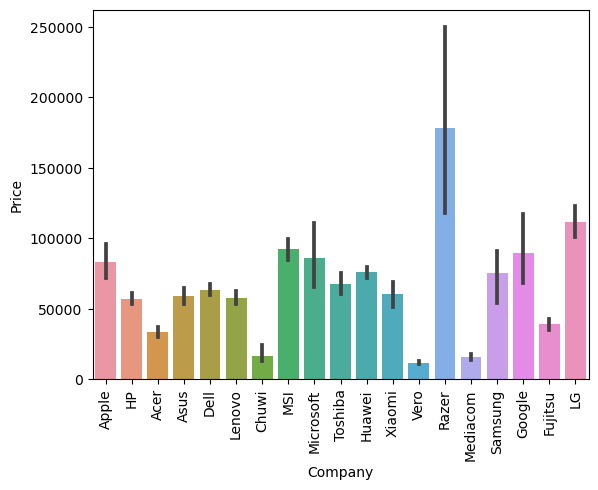

In [640]:
sns.barplot(x=laptops["Company"],y=laptops["Price"])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='TypeName'>

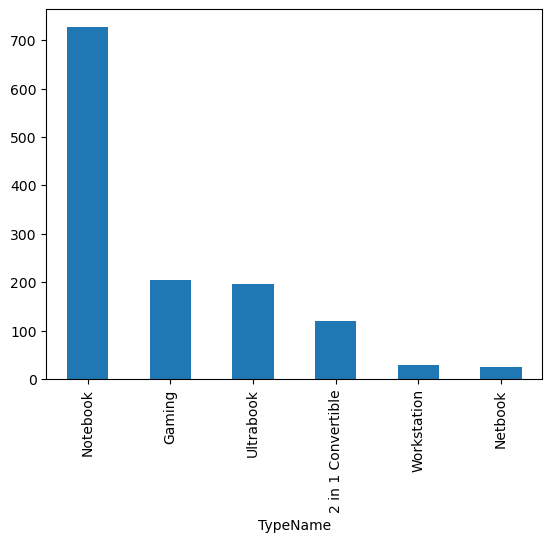

In [641]:
laptops["TypeName"].value_counts().plot(kind='bar')

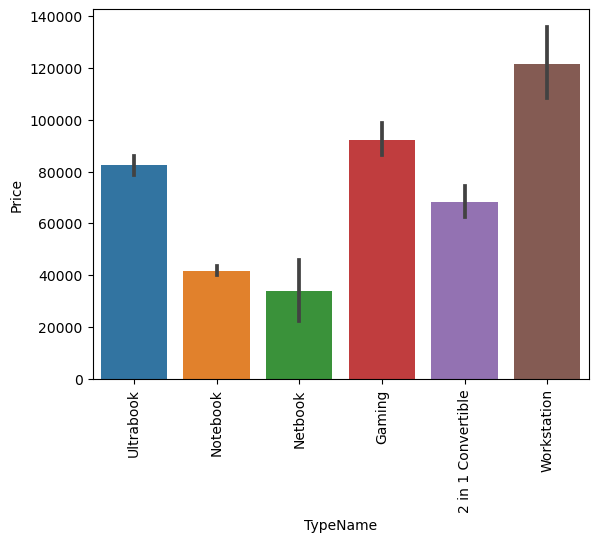

In [642]:
sns.barplot(x=laptops["TypeName"],y=laptops["Price"])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Inches', ylabel='Density'>

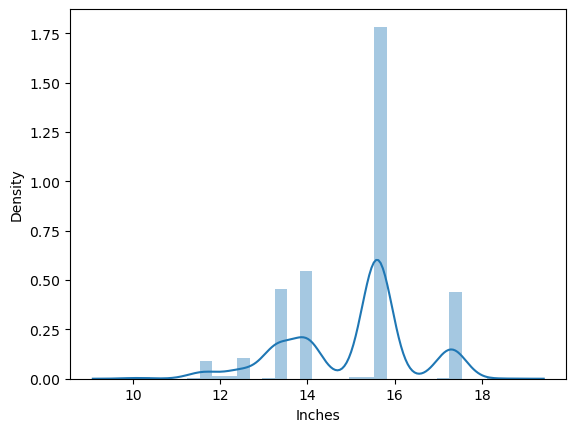

In [643]:
sns.distplot(laptops["Inches"])

In [644]:
laptops["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [645]:
laptops["touchscreen"] = laptops["ScreenResolution"].str.contains("Touchscreen")

In [646]:
laptops.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False


In [647]:
laptops["touchscreen"].value_counts()

touchscreen
False    1111
True      192
Name: count, dtype: int64

<Axes: xlabel='touchscreen', ylabel='Price'>

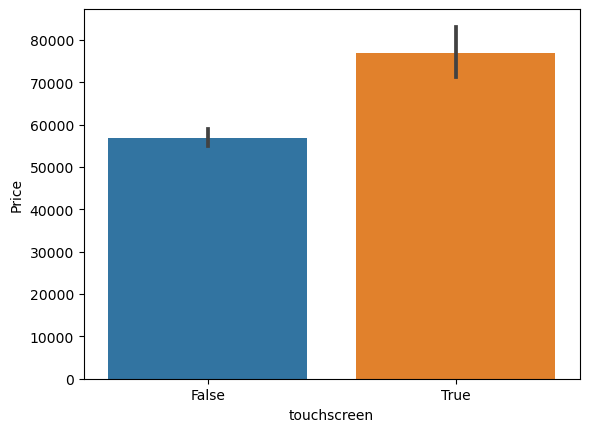

In [648]:
sns.barplot(x=laptops["touchscreen"],y=laptops["Price"])

In [649]:
laptops["IPS"] = laptops["ScreenResolution"].str.contains("IPS")

In [650]:
laptops.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True


In [651]:
laptops["IPS"].value_counts()

IPS
False    938
True     365
Name: count, dtype: int64

<Axes: xlabel='IPS', ylabel='Price'>

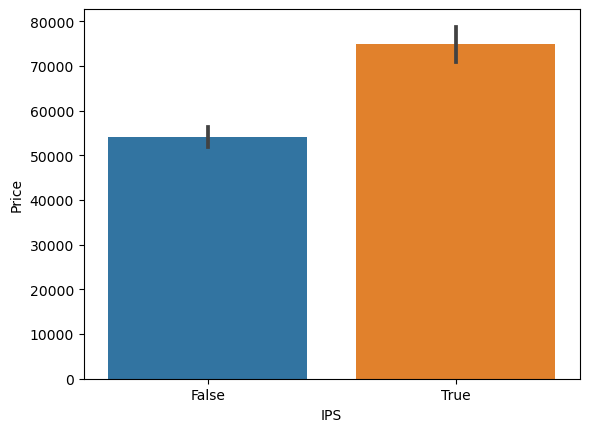

In [652]:
sns.barplot(x=laptops["IPS"],y=laptops["Price"])

In [653]:
laptops["Screen_Resolution"] = laptops["ScreenResolution"].str.findall(r'(\d+\.?\w\d+\.?)').apply(lambda x:x[0])

In [654]:
laptops["Screen_Resolution"].value_counts()

Screen_Resolution
1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: count, dtype: int64

In [655]:
laptops.drop('ScreenResolution',axis=1,inplace=True)

In [656]:
laptops.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,Screen_Resolution
0,0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,2560x1600
1,1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,1440x900
2,2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,1920x1080
3,3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,2880x1800
4,4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,2560x1600


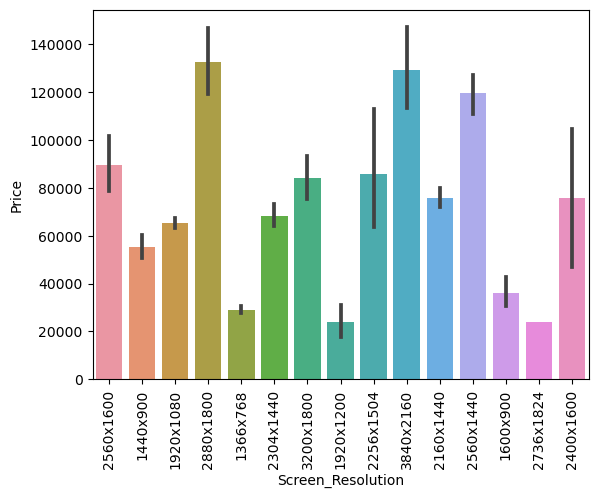

In [657]:
sns.barplot(x=laptops['Screen_Resolution'] , y=laptops['Price'])
plt.xticks(rotation=90)
plt.show()

In [658]:
laptops['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [659]:
laptops['Cpu']=laptops['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [660]:
laptops['Cpu'].value_counts()

Cpu
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD 

In [661]:
def fetch_processor(processor):
    if processor == "Intel Core i7" or processor =="Intel Core i5" or processor=="Intel Core i3":
        return processor
    else:
        if processor.split()[0] == "Intel":
            return "Other intel processors"
        else:
            return "AMD processors"

In [662]:
laptops['Cpu'] = laptops['Cpu'].apply(fetch_processor)

In [663]:
laptops.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,Screen_Resolution
0,0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,2560x1600
1,1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,1440x900
2,2,HP,Notebook,15.6,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,1920x1080
3,3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,2880x1800
4,4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,2560x1600


In [664]:
laptops['Cpu'].value_counts()

Cpu
Intel Core i7             527
Intel Core i5             423
Other intel processors    154
Intel Core i3             136
AMD processors             63
Name: count, dtype: int64

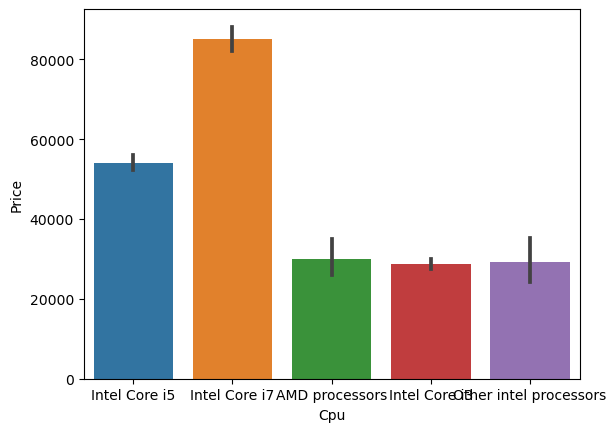

<Figure size 3000x2700 with 0 Axes>

In [665]:
sns.barplot(x=laptops['Cpu'],y=laptops['Price'])
plt.figure(figsize=(30,27))
plt.show()

<Axes: xlabel='Ram'>

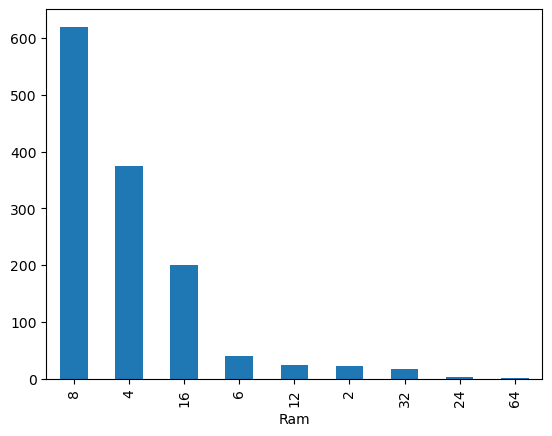

In [666]:
laptops['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

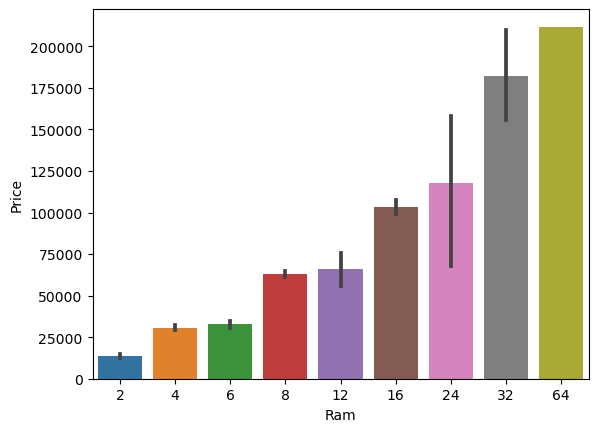

In [667]:
sns.barplot(x=laptops['Ram'],y=laptops['Price'])

In [668]:
laptops.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,Screen_Resolution
0,0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,2560x1600
1,1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,1440x900
2,2,HP,Notebook,15.6,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,1920x1080
3,3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,2880x1800
4,4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,2560x1600


In [669]:
laptops['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [670]:
laptops['Gpu'] = laptops['Gpu'].apply(lambda x: x.split()[0])

In [671]:
laptops['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [672]:
laptops = laptops[laptops['Gpu'] != 'ARM']

In [673]:
laptops['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

<Axes: xlabel='Gpu', ylabel='Price'>

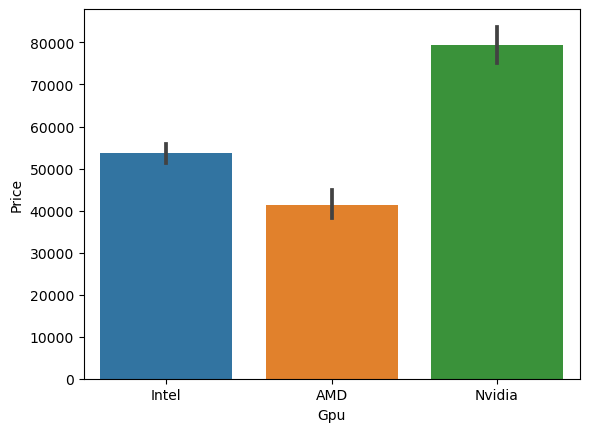

In [674]:
sns.barplot(x=laptops['Gpu'],y=laptops['Price'])

In [675]:
laptops = laptops.drop('Unnamed: 0',axis=1)



In [676]:
laptops.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,Screen_Resolution
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel,macOS,1.37,71378.6832,False,True,2560x1600
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel,macOS,1.34,47895.5232,False,False,1440x900
2,HP,Notebook,15.6,Intel Core i5,8,256GB SSD,Intel,No OS,1.86,30636.0000,False,False,1920x1080
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD,macOS,1.83,135195.3360,False,True,2880x1800
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel,macOS,1.37,96095.8080,False,True,2560x1600


In [677]:
laptops['touchscreen'] = laptops['touchscreen'].astype(str)
laptops['IPS'] = laptops['IPS'].astype(str)

In [678]:
laptops['touchscreen'] = laptops['touchscreen'].str.replace('False','0')
laptops['touchscreen'] = laptops['touchscreen'].str.replace('True','1')


In [679]:
laptops['IPS'] = laptops['IPS'].str.replace('False','0')
laptops['IPS'] = laptops['IPS'].str.replace('True','1')

In [680]:
laptops['touchscreen'] = laptops['touchscreen'].astype(int)
laptops['IPS'] = laptops['IPS'].astype(int)

In [681]:
laptops.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,Screen_Resolution
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel,macOS,1.37,71378.6832,0,1,2560x1600
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel,macOS,1.34,47895.5232,0,0,1440x900
2,HP,Notebook,15.6,Intel Core i5,8,256GB SSD,Intel,No OS,1.86,30636.0000,0,0,1920x1080
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD,macOS,1.83,135195.3360,0,1,2880x1800
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel,macOS,1.37,96095.8080,0,1,2560x1600


In [683]:
new = laptops["Memory"].str.split("+", n = 1, expand = True)

In [685]:
laptops['first_memory'] = new[0]
laptops['second_memory'] = new[1]

In [689]:
laptops['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

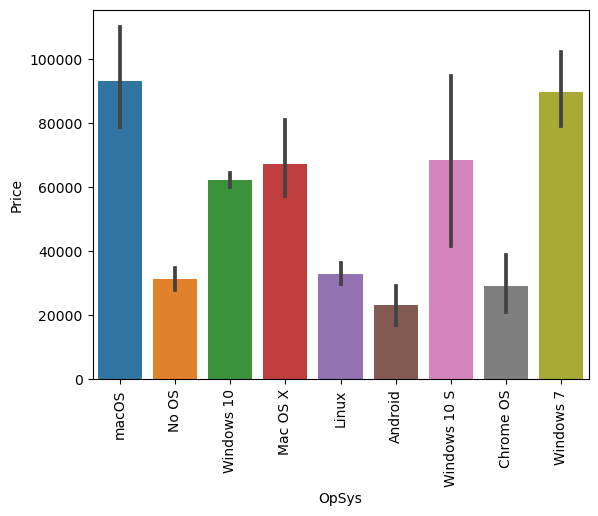

In [690]:
sns.barplot(x=laptops['OpSys'],y=laptops['Price'])
plt.xticks(rotation=90)
plt.show()

In [691]:
def fetch_os(os):
    if os == "Windows 10" or os == "Windows 7" or os == "Windows 10 S":
        return "Windows"
    if os == "macOS" or os == "Mac OS X":
        return "MAC OS"
    else:
        return "Others/No OS/Linux"
    

In [692]:
laptops['OS'] = laptops['OpSys'].apply(fetch_os)

In [693]:
laptops.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,Screen_Resolution,first_memory,second_memory,OS
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel,macOS,1.37,71378.6832,0,1,2560x1600,128GB SSD,None,MAC OS
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel,macOS,1.34,47895.5232,0,0,1440x900,128GB Flash Storage,None,MAC OS
2,HP,Notebook,15.6,Intel Core i5,8,256GB SSD,Intel,No OS,1.86,30636.0000,0,0,1920x1080,256GB SSD,None,Others/No OS/Linux
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD,macOS,1.83,135195.3360,0,1,2880x1800,512GB SSD,None,MAC OS
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel,macOS,1.37,96095.8080,0,1,2560x1600,256GB SSD,None,MAC OS


In [694]:
laptops = laptops.drop('OpSys',axis=1)

In [695]:
laptops.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,Weight,Price,touchscreen,IPS,Screen_Resolution,first_memory,second_memory,OS
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel,1.37,71378.6832,0,1,2560x1600,128GB SSD,None,MAC OS
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel,1.34,47895.5232,0,0,1440x900,128GB Flash Storage,None,MAC OS
2,HP,Notebook,15.6,Intel Core i5,8,256GB SSD,Intel,1.86,30636.0000,0,0,1920x1080,256GB SSD,None,Others/No OS/Linux
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD,1.83,135195.3360,0,1,2880x1800,512GB SSD,None,MAC OS
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel,1.37,96095.8080,0,1,2560x1600,256GB SSD,None,MAC OS


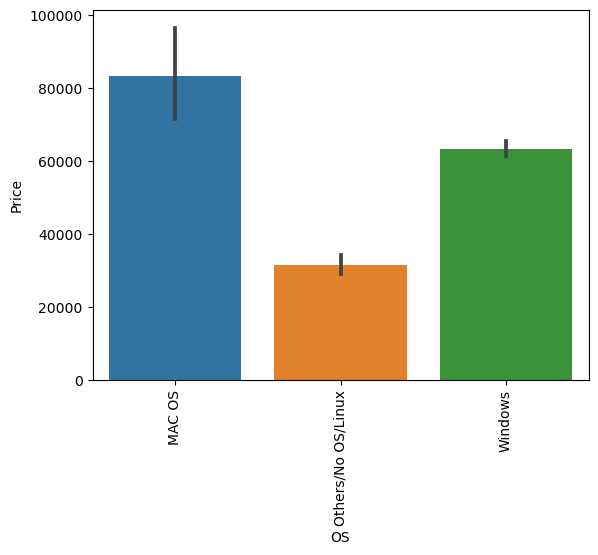

In [696]:
sns.barplot(x=laptops['OS'],y=laptops['Price'])
plt.xticks(rotation=90)
plt.show()

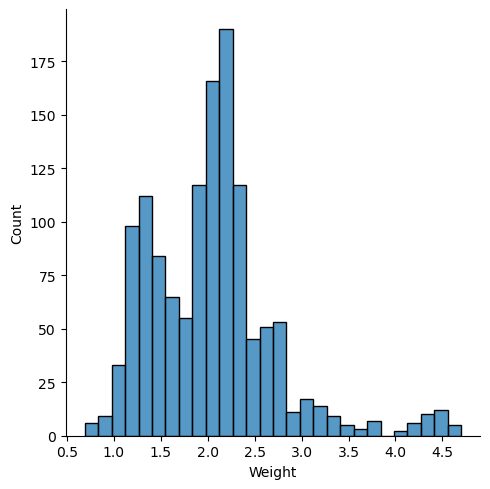

In [697]:
sns.displot(laptops['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

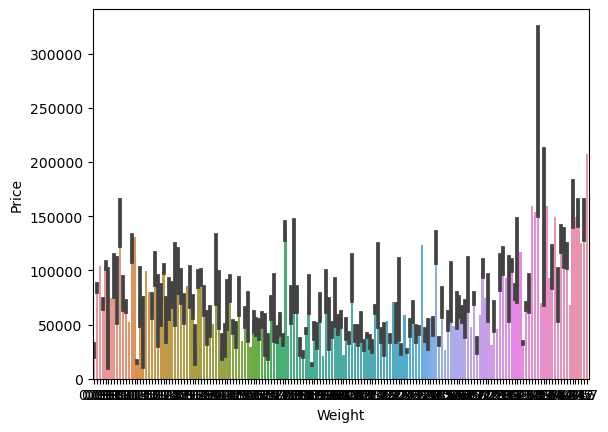

In [698]:
sns.barplot(x=laptops['Weight'],y=laptops['Price'])


<Axes: xlabel='Weight', ylabel='Price'>

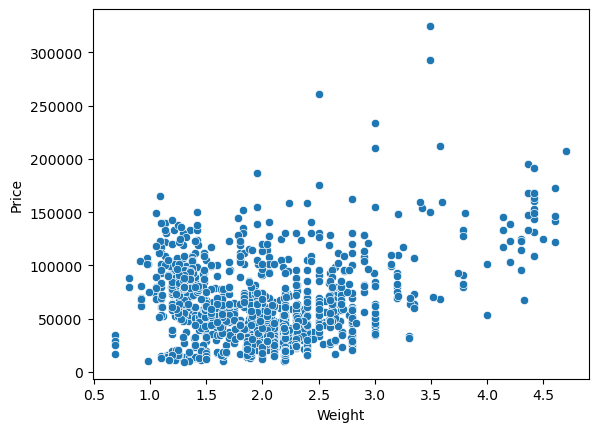

In [699]:
sns.scatterplot(x=laptops['Weight'],y=laptops['Price'])


In [700]:
laptops = laptops.drop('Inches',axis=1)

<Axes: xlabel='Price', ylabel='Density'>

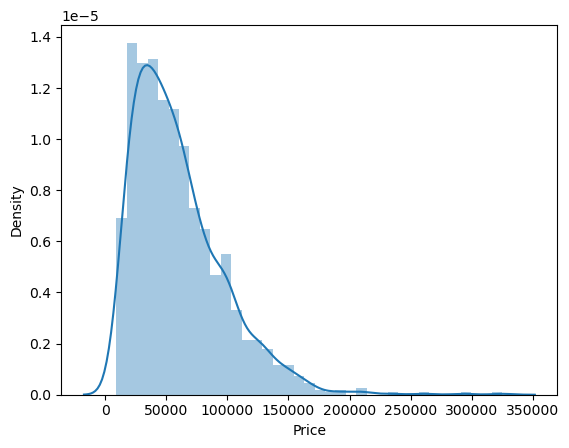

In [701]:
# Our price column is skewed , therefore applying log to the column.
sns.distplot(laptops['Price'])

<Axes: xlabel='Price', ylabel='Density'>

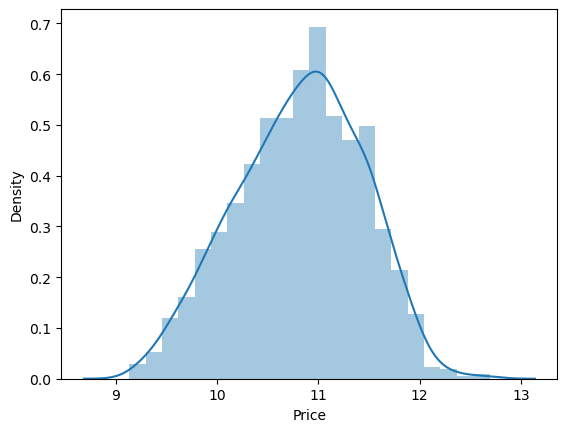

In [702]:
sns.distplot(np.log(laptops['Price']))

In [712]:
laptops.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,Weight,Price,touchscreen,IPS,Screen_Resolution,first_memory,second_memory,OS
0,Apple,Ultrabook,Intel Core i5,8,128GB SSD,Intel,1.37,71378.6832,0,1,2560x1600,128GB SSD,None,MAC OS
1,Apple,Ultrabook,Intel Core i5,8,128GB Flash Storage,Intel,1.34,47895.5232,0,0,1440x900,128GB Flash Storage,None,MAC OS
2,HP,Notebook,Intel Core i5,8,256GB SSD,Intel,1.86,30636.0000,0,0,1920x1080,256GB SSD,None,Others/No OS/Linux
3,Apple,Ultrabook,Intel Core i7,16,512GB SSD,AMD,1.83,135195.3360,0,1,2880x1800,512GB SSD,None,MAC OS
4,Apple,Ultrabook,Intel Core i5,8,256GB SSD,Intel,1.37,96095.8080,0,1,2560x1600,256GB SSD,None,MAC OS


In [713]:
laptops.drop('Memory',axis=1,inplace=True)


In [724]:
laptops.drop('first_memory',axis=1,inplace=True)
laptops.drop('second_memory',axis=1,inplace=True)


In [725]:
X = laptops.drop(columns='Price')
y = np.log(laptops['Price'])

In [726]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [727]:
X_train

,Company,TypeName,Cpu,Ram,Gpu,Weight,touchscreen,IPS,Screen_Resolution,OS
183,Toshiba,Notebook,Intel Core i5,8,Intel,2.00,0,0,1366x768,Windows
1141,MSI,Gaming,Intel Core i7,8,Nvidia,2.40,0,0,1920x1080,Windows
1049,Asus,Netbook,Other intel processors,4,Intel,1.20,0,0,1366x768,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,Intel Core i3,4,Intel,2.08,1,1,1920x1080,Windows
878,Dell,Notebook,Intel Core i5,4,Nvidia,2.18,0,0,1920x1080,Windows
...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,Intel Core i3,4,Nvidia,2.20,0,0,1366x768,Windows
299,Asus,Ultrabook,Intel Core i7,16,Nvidia,1.63,0,0,1920x1080,Windows
493,Acer,Notebook,AMD processors,8,AMD,2.20,0,0,1366x768,Windows
527,Lenovo,Notebook,Intel Core i3,8,Nvidia,2.20,0,0,1366x768,Others/No OS/Linux


In [728]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [729]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [730]:
X.head(10)

,Company,TypeName,Cpu,Ram,Gpu,Weight,touchscreen,IPS,Screen_Resolution,OS
0,Apple,Ultrabook,Intel Core i5,8,Intel,1.37,0,1,2560x1600,MAC OS
1,Apple,Ultrabook,Intel Core i5,8,Intel,1.34,0,0,1440x900,MAC OS
2,HP,Notebook,Intel Core i5,8,Intel,1.86,0,0,1920x1080,Others/No OS/Linux
3,Apple,Ultrabook,Intel Core i7,16,AMD,1.83,0,1,2880x1800,MAC OS
4,Apple,Ultrabook,Intel Core i5,8,Intel,1.37,0,1,2560x1600,MAC OS
5,Acer,Notebook,AMD processors,4,AMD,2.10,0,0,1366x768,Windows
6,Apple,Ultrabook,Intel Core i7,16,Intel,2.04,0,1,2880x1800,MAC OS
7,Apple,Ultrabook,Intel Core i5,8,Intel,1.34,0,0,1440x900,MAC OS
8,Asus,Ultrabook,Intel Core i7,16,Nvidia,1.30,0,0,1920x1080,Windows
9,Acer,Ultrabook,Intel Core i5,8,Intel,1.60,0,1,1920x1080,Windows


In [733]:
# one hot encoding
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,8,9])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))



R2 score 0.7912480950551584
MAE 0.21999266077628774


In [734]:
X_test[:1]

,Company,TypeName,Cpu,Ram,Gpu,Weight,touchscreen,IPS,Screen_Resolution,OS
248,HP,Notebook,Intel Core i5,4,Intel,1.49,0,1,1920x1080,Windows


In [735]:
lr = LinearRegression()

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,8,9])
],remainder='passthrough')

step3 = LinearRegression()

pipe2 = Pipeline([
    ('step1',step1),
    ('step3',step3)
])

pipe2.fit(X_train,y_train)

y_pred2 = pipe2.predict(X_test)

print('R2 score',r2_score(y_test,y_pred2))
print('MAE',mean_absolute_error(y_test,y_pred2))


R2 score 0.7912480950551584
MAE 0.21999266077628774


In [736]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,8,9])
],remainder='passthrough')

step4 = Ridge(alpha=10)

pipe3 = Pipeline([
    ('step1',step1),
    ('step4',step4)
])

pipe3.fit(X_train,y_train)

y_pred3 = pipe3.predict(X_test)

print('R2 score',r2_score(y_test,y_pred3))
print('MAE',mean_absolute_error(y_test,y_pred3))

R2 score 0.795112574915208
MAE 0.21670609381706277


In [737]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,8,9])
],remainder='passthrough')

step5 = Lasso(alpha=0.001)

pipe4 = Pipeline([
    ('step1',step1),
    ('step5',step5)
])

pipe4.fit(X_train,y_train)

y_pred4 = pipe4.predict(X_test)

print('R2 score',r2_score(y_test,y_pred4))
print('MAE',mean_absolute_error(y_test,y_pred4))

R2 score 0.7899768384013288
MAE 0.21967593903569296


In [738]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,8,9])
],remainder='passthrough')

step6 = KNeighborsRegressor(n_neighbors=3)

pipe5 = Pipeline([
    ('step1',step1),
    ('step6',step6)
])

pipe5.fit(X_train,y_train)

y_pred5 = pipe5.predict(X_test)

print('R2 score',r2_score(y_test,y_pred5))
print('MAE',mean_absolute_error(y_test,y_pred5))

R2 score 0.8634008554267455
MAE 0.17126719494373693


In [739]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,8,9])
],remainder='passthrough')

step7 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe6 = Pipeline([
    ('step1',step1),
    ('step7',step7)
])

pipe6.fit(X_train,y_train)

y_pred6 = pipe6.predict(X_test)

print('R2 score',r2_score(y_test,y_pred6))
print('MAE',mean_absolute_error(y_test,y_pred6))

R2 score 0.8768813213507921
MAE 0.16123428947944043


## Exporting the model

In [740]:
laptops.head()

,Company,TypeName,Cpu,Ram,Gpu,Weight,Price,touchscreen,IPS,Screen_Resolution,OS
0,Apple,Ultrabook,Intel Core i5,8,Intel,1.37,71378.6832,0,1,2560x1600,MAC OS
1,Apple,Ultrabook,Intel Core i5,8,Intel,1.34,47895.5232,0,0,1440x900,MAC OS
2,HP,Notebook,Intel Core i5,8,Intel,1.86,30636.0000,0,0,1920x1080,Others/No OS/Linux
3,Apple,Ultrabook,Intel Core i7,16,AMD,1.83,135195.3360,0,1,2880x1800,MAC OS
4,Apple,Ultrabook,Intel Core i5,8,Intel,1.37,96095.8080,0,1,2560x1600,MAC OS


In [741]:
import pickle

pickle.dump(laptops,open('laptops.pkl','wb'))
pickle.dump(pipe6,open('Model.pkl','wb'))

In [742]:
X

,Company,TypeName,Cpu,Ram,Gpu,Weight,touchscreen,IPS,Screen_Resolution,OS
0,Apple,Ultrabook,Intel Core i5,8,Intel,1.37,0,1,2560x1600,MAC OS
1,Apple,Ultrabook,Intel Core i5,8,Intel,1.34,0,0,1440x900,MAC OS
2,HP,Notebook,Intel Core i5,8,Intel,1.86,0,0,1920x1080,Others/No OS/Linux
3,Apple,Ultrabook,Intel Core i7,16,AMD,1.83,0,1,2880x1800,MAC OS
4,Apple,Ultrabook,Intel Core i5,8,Intel,1.37,0,1,2560x1600,MAC OS
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7,4,Intel,1.80,1,1,1920x1080,Windows
1299,Lenovo,2 in 1 Convertible,Intel Core i7,16,Intel,1.30,1,1,3200x1800,Windows
1300,Lenovo,Notebook,Other intel processors,2,Intel,1.50,0,0,1366x768,Windows
1301,HP,Notebook,Intel Core i7,6,AMD,2.19,0,0,1366x768,Windows


In [747]:
model = pd.read_pickle("Model.pkl")

In [744]:
data = [['HP','Notebook','Intel Core i5',4,'Intel',1.49,0,1,'1920x1080','Windows']]

In [745]:
query = pd.DataFrame(data, columns= ['Company', 'TypeName', 'Cpu', 'Ram', 'Gpu', 'Weight',
       'touchscreen', 'IPS', 'Screen_Resolution', 'OS'])

In [748]:
np.exp(model.predict(query))

array([45962.53194419])